Anomalies nationales détectées et sauvegardées : datasets/final/anomalies_2.csv
Statistiques descriptives :
           year   population  population_urbaine  taux_croissance_pop  \
count    24.00        24.00               24.00                24.00   
mean   2011.50  10409007.38          4650440.75                 2.92   
std       7.07   2140555.82          1334089.24                 0.18   
min    2000.00   7221619.00          2768263.00                 2.52   
25%    2005.75   8626467.50          3530419.75                 2.86   
50%    2011.50  10245640.00          4494796.50                 2.96   
75%    2017.25  12125671.75          5687775.25                 3.04   
max    2023.00  14111034.00          7069628.00                 3.22   

            gdp_usd  inflation  taux_chomage  exportations  esperance_vie  \
count  2.400000e+01      24.00         24.00  2.400000e+01          24.00   
mean   1.068449e+10      99.99          1.37  2.483505e+09          58.61   
std    4.53

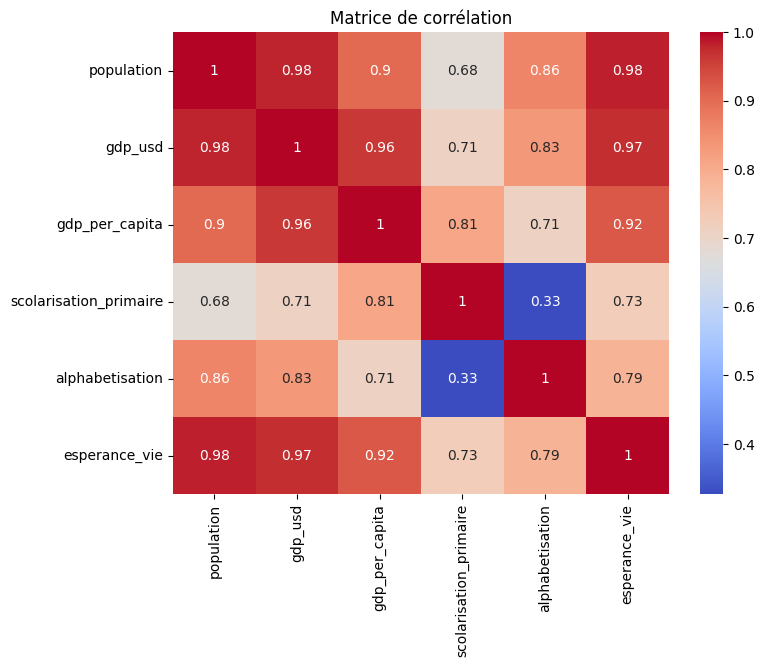

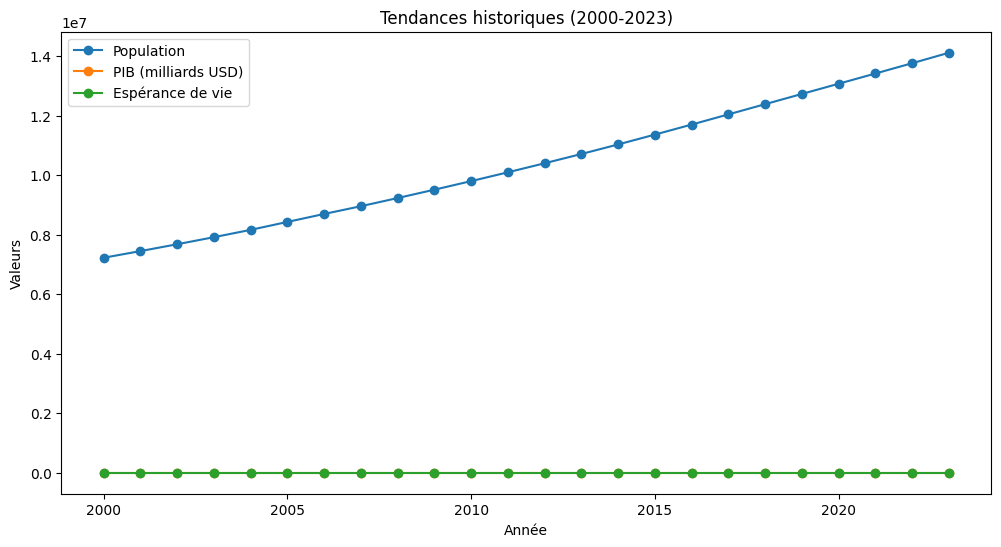

Anomalies régionales sauvegardées : datasets/final/anomalies_region_2.csv
Dataset Tâche 2 sauvegardé : datasets/final/benin_multi_dashboard.csv


,year,region,population,gdp_usd,country,population_urbaine,taux_croissance_pop,inflation,taux_chomage,exportations,esperance_vie,alphabetisation,scolarisation_primaire,nb_participants_olympiques,pop_growth_pct,gdp_growth_pct,school_to_literacy_ratio,health_index,gdp_per_capita
0,2000,Atlantique,1298862,6.330967e+08,Benin,2768263,3.076653,74.331948,0.864,7.253049e+08,56.594,NaN,80.111214,0,NaN,NaN,NaN,56.594,487.424141
1,2001,Atlantique,1338041,6.588534e+08,Benin,2877723,3.054355,77.293552,0.765,7.284263e+08,56.654,NaN,87.407501,0,3.016410,4.068367,NaN,56.654,492.401500
2,2002,Atlantique,1383140,7.558360e+08,Benin,2996179,3.040108,79.217514,0.690,8.274017e+08,56.851,35.0,92.610580,0,3.370525,14.719904,2.646017,56.851,546.463830
3,2003,Atlantique,1425853,9.638807e+08,Benin,3128511,3.049203,80.395671,0.747,9.973316e+08,57.092,NaN,96.328888,0,3.088118,27.525119,NaN,57.092,676.002878
4,2004,Atlantique,1467834,1.113639e+09,Benin,3266820,3.061731,81.098241,0.790,1.146039e+09,57.346,NaN,100.354599,0,2.944273,15.537064,NaN,57.346,758.695804


In [ ]:
# ================================
# ANIP Challenge – Tâche 2 : Exploration & Analyse
# Olivier FATOMBI
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ----------------------------
# 1. Préparation des dossiers et chargement dataset Tâche 1
# ----------------------------
os.makedirs("datasets/final", exist_ok=True)
dataset_fp = "datasets/final/benin_multi_enriched_apis.csv"
df = pd.read_csv(dataset_fp)

# Assurer types corrects
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# ----------------------------
# 2. Calcul d'indicateurs dérivés nationaux
# ----------------------------
df = df.sort_values('year').reset_index(drop=True)

# Croissance annuelle en %
df['pop_growth_pct'] = df['population'].pct_change() * 100
df['gdp_growth_pct'] = df['gdp_usd'].pct_change() * 100

# Ratios et indices
df['gdp_per_capita'] = df['gdp_usd'] / df['population']
df['school_to_literacy_ratio'] = df['scolarisation_primaire'] / df['alphabetisation']
df['health_index'] = df['esperance_vie'] / 1

# ----------------------------
# 3. Détection et sauvegarde anomalies nationales
# ----------------------------
anomalies = df[
    (df['population'] <= 0) |
    (df['gdp_usd'] <= 0) |
    (df['gdp_per_capita'] <= 0) |
    (df['alphabetisation'] > 150) |
    (df['scolarisation_primaire'] > 150)
].copy()

anomalies_fp = "datasets/final/anomalies_2.csv"
anomalies.to_csv(anomalies_fp, index=False)
print(f"Anomalies nationales détectées et sauvegardées : {anomalies_fp}")

# ----------------------------
# 4. Analyse exploratoire simple
# ----------------------------
# Statistiques descriptives
desc_stats = df.describe().round(2)
print("Statistiques descriptives :\n", desc_stats)

# Matrice de corrélation
corr_cols = [
    'population', 'gdp_usd', 'gdp_per_capita',
    'scolarisation_primaire', 'alphabetisation',
    'esperance_vie'
]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Tendances historiques
plt.figure(figsize=(12,6))
plt.plot(df['year'], df['population'], marker='o', label='Population')
plt.plot(df['year'], df['gdp_usd']/1e9, marker='o', label='PIB (milliards USD)')
plt.plot(df['year'], df['esperance_vie'], marker='o', label='Espérance de vie')
plt.xlabel("Année")
plt.ylabel("Valeurs")
plt.title("Tendances historiques (2000-2023)")
plt.legend()
plt.show()

# ----------------------------
# 5. Simulation des données régionales
# ----------------------------
regions = ['Atlantique', 'Ouémé', 'Littoral', 'Zou', 'Collines', 'Mono']
region_proportions = [0.18, 0.16, 0.15, 0.17, 0.17, 0.17]  # somme = 1
np.random.seed(42)

region_dfs = []

for _, row in df.iterrows():
    year = row['year']
    pop_total = int(row['population'])
    gdp_total = row['gdp_usd']
    indicators = row.drop(['year', 'population', 'gdp_usd', 'gdp_per_capita']).to_dict()

    # Allocation population/PIB par région
    pop_regions = np.random.multinomial(pop_total, region_proportions)
    gdp_regions = (pop_regions / pop_total) * gdp_total

    temp = pd.DataFrame({
        'year': year,
        'region': regions,
        'population': pop_regions,
        'gdp_usd': gdp_regions
    })

    # Ajouter indicateurs multi-source (copie de la valeur nationale)
    for col, val in indicators.items():
        temp[col] = val

    # Calculs dérivés régionaux
    temp['gdp_per_capita'] = temp['gdp_usd'] / temp['population']
    temp['school_to_literacy_ratio'] = temp['scolarisation_primaire'] / temp['alphabetisation']
    temp['health_index'] = temp['esperance_vie'] / 1

    region_dfs.append(temp)

df_region = pd.concat(region_dfs, ignore_index=True)

# ----------------------------
# 6. Croissance régionale
# ----------------------------
df_region = df_region.sort_values(['region','year']).reset_index(drop=True)
df_region['pop_growth_pct'] = df_region.groupby('region')['population'].pct_change() * 100
df_region['gdp_growth_pct'] = df_region.groupby('region')['gdp_usd'].pct_change() * 100

# ----------------------------
# 7. Détection anomalies régionales
# ----------------------------
anomalies_region = df_region[
    (df_region['population'] <= 0) |
    (df_region['gdp_usd'] <= 0) |
    (df_region['gdp_per_capita'] <= 0) |
    (df_region['alphabetisation'] > 150)
].copy()

anomalies_region_fp = "datasets/final/anomalies_region_2.csv"
anomalies_region.to_csv(anomalies_region_fp, index=False)
print(f"Anomalies régionales sauvegardées : {anomalies_region_fp}")

# ----------------------------
# 8. Sauvegarde dataset régional pour dashboard
# ----------------------------
out_fp_dashboard = "datasets/final/benin_multi_dashboard.csv"
df_region.to_csv(out_fp_dashboard, index=False)
print(f"Dataset Tâche 2 sauvegardé : {out_fp_dashboard}")

# Aperçu final
display(df_region.head())
